In [88]:
import triag_solve
import triag_solve_cuda
import torch.cuda
from torch.optim import Adam
from torch.linalg import solve
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

N = 10
batchsize = 8
n = 100

Device: cuda


In [89]:
mu = torch.randn(1, n,1, requires_grad=True, dtype=torch.double, device=device)
Ui = torch.rand(1, n,n, requires_grad=True, dtype=torch.double, device=device)
opt = Adam([mu, Ui])



In [90]:
losses = np.zeros(N)
for i in tqdm(range(N)):
    U = torch.triu(Ui)
    X = torch.randn(batchsize, n, 1, dtype=torch.double).to(device)
    L = U.mT.inverse()
    G = torch.randn(batchsize, n, 1, dtype=torch.double, device=device)
    Y = mu + L @ G

    loss1 = ((X-Y)**2).sum()/batchsize
    loss2 = torch.log(torch.diagonal(U,dim1=1, dim2=2)).sum()
    loss = loss1+loss2
    
    #print(loss)
    losses[i] = loss.cpu().detach().numpy()
    loss.backward()
    opt.step()



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 643.54it/s]


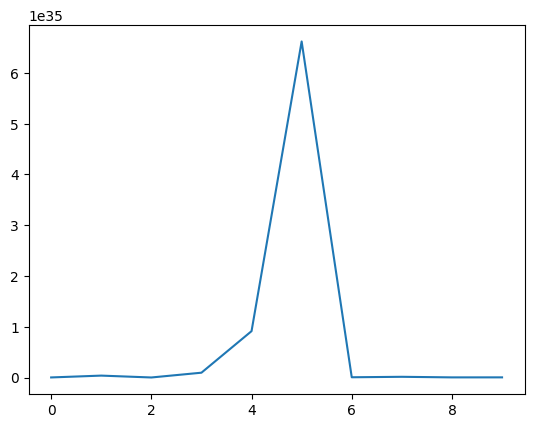

In [91]:
plt.plot(losses)

In [92]:
U

tensor([[[0.2838, 0.3876, 0.6079,  ..., 0.1399, 0.5936, 0.8239],
         [0.0000, 0.0419, 0.9606,  ..., 0.5544, 0.7973, 0.9327],
         [0.0000, 0.0000, 0.5034,  ..., 0.3531, 0.4319, 0.8648],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.7384, 0.4385, 0.7578],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.5878, 0.9874],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.8473]]],
       device='cuda:0', dtype=torch.float64, grad_fn=<TriuBackward0>)

In [95]:
losses[:]

array([1.35363364e+32, 3.73324829e+33, 5.28738085e+31, 9.46855593e+33,
       9.13391989e+34, 6.61971675e+35, 4.68040459e+32, 1.38190674e+33,
       2.36592232e+32, 2.81939397e+32])

In [94]:
mu

tensor([[[-1.7792e-01],
         [-8.4750e-01],
         [ 2.2631e+00],
         [-2.6318e-01],
         [-6.7255e-02],
         [ 2.9035e-01],
         [ 2.0258e-01],
         [ 2.0891e+00],
         [ 8.5566e-01],
         [-8.2295e-01],
         [-3.9624e-01],
         [-1.9408e-01],
         [-1.0424e+00],
         [-1.1435e+00],
         [-1.0319e+00],
         [-5.8390e-01],
         [ 6.7391e-01],
         [ 1.6450e+00],
         [ 1.3744e+00],
         [ 1.0758e+00],
         [ 1.0380e+00],
         [ 1.1899e-01],
         [ 6.4613e-01],
         [ 8.4586e-01],
         [-2.2865e+00],
         [-1.1341e-02],
         [-8.3984e-01],
         [-8.8236e-01],
         [-1.9522e+00],
         [-1.2598e+00],
         [-1.6217e-01],
         [-1.8257e+00],
         [-1.0505e+00],
         [ 6.8664e-01],
         [-1.8634e+00],
         [-9.8957e-01],
         [ 8.1825e-01],
         [ 6.9387e-01],
         [ 1.7641e-01],
         [-1.0958e+00],
         [-1.2245e+00],
         [-6.997